## What Are Type I and Type II Errors? (The Simple Story)

### 🎯 Think of it like this:
You're a **doctor** and a patient comes to you feeling sick. You need to decide:
- **Is the patient sick?** (Need treatment)
- **Is the patient healthy?** (No treatment needed)

But here's the problem: **You can't be 100% sure!** Tests aren't perfect, symptoms can be confusing.

### 🎭 Two Types of Mistakes You Can Make:

**Type I Error (False Alarm) 🚨**
- You think the patient is sick, but they're actually healthy
- You give unnecessary treatment
- **"False Positive"**

**Type II Error (Missed Detection) 😴**
- You think the patient is healthy, but they're actually sick  
- You miss treating someone who needs help
- **"False Negative"**



## Let's See This with a Simple Example

### 🔥 Fire Alarm System

**Scenario**: Your building has a fire alarm system
- **Normal situation**: No fire (everything is fine)
- **Emergency situation**: Fire present (need to evacuate!)

### The Two Possible Mistakes:



In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Let's simulate 1000 days in a building
np.random.seed(42)
total_days = 1000

# In reality, fires are rare - let's say 2% chance per day
fire_probability = 0.02
actual_fires = np.random.binomial(1, fire_probability, total_days)

In [41]:
print("🏢 Building Fire Simulation:")
print(f"Total days observed: {total_days}")
print(f"Days with actual fires: {sum(actual_fires)}")
print(f"Days with no fires: {total_days - sum(actual_fires)}")

🏢 Building Fire Simulation:
Total days observed: 1000
Days with actual fires: 18
Days with no fires: 982


In [42]:
# Now let's simulate our fire alarm system
# It's not perfect - sometimes it makes mistakes!

In [47]:
def simulate_fire_alarm(actual_fires, sensitivity=0.95, false_alarm_rate=0.03):
    """
    Simulate a fire alarm system
    sensitivity: How good it is at detecting real fires (95% = detects 95% of real fires)
    false_alarm_rate: How often it gives false alarms (3% = false alarm 3% of normal days)
    """
    alarm_triggers = []

    for day_has_fire in actual_fires:
        if day_has_fire == 1:  # There IS a fire today
            # Will the alarm detect it? (depends on sensitivity)
            alarm_goes_off = np.random.binomial(1, sensitivity)
        else:  # There is NO fire today
            # Will there be a false alarm? (depends on false_alarm_rate)
            alarm_goes_off = np.random.binomial(1, false_alarm_rate)

        alarm_triggers.append(alarm_goes_off)

    return np.array(alarm_triggers)

In [44]:
# Run our simulation
alarm_results = simulate_fire_alarm(actual_fires)

In [45]:
print(f"\n🚨 Fire Alarm Results:")
print(f"Days alarm went off: {sum(alarm_results)}")
print(f"Days alarm was quiet: {total_days - sum(alarm_results)}")


🚨 Fire Alarm Results:
Days alarm went off: 53
Days alarm was quiet: 947


### Understanding the Four Outcomes

In [46]:
# Let's count what actually happened
true_positives = sum((actual_fires == 1) & (alarm_results == 1))    # Fire + Alarm = GOOD!
false_positives = sum((actual_fires == 0) & (alarm_results == 1))   # No Fire + Alarm = TYPE I ERROR
true_negatives = sum((actual_fires == 0) & (alarm_results == 0))    # No Fire + No Alarm = GOOD!
false_negatives = sum((actual_fires == 1) & (alarm_results == 0))   # Fire + No Alarm = TYPE II ERROR

In [10]:
print("\n📊 What Actually Happened:")
print(f"✅ True Positives (Correctly detected fire): {true_positives}")
print(f"❌ False Positives (TYPE I ERROR - False alarm): {false_positives}")
print(f"✅ True Negatives (Correctly quiet on safe days): {true_negatives}")
print(f"❌ False Negatives (TYPE II ERROR - Missed fire): {false_negatives}")


📊 What Actually Happened:
✅ True Positives (Correctly detected fire): 18
❌ False Positives (TYPE I ERROR - False alarm): 35
✅ True Negatives (Correctly quiet on safe days): 947
❌ False Negatives (TYPE II ERROR - Missed fire): 0


In [11]:
print(f"\n🎯 Error Rates:")
print(f"Type I Error Rate (False Alarm Rate): {false_positives/(false_positives + true_negatives)*100:.1f}%")
print(f"Type II Error Rate (Missed Fire Rate): {false_negatives/(false_negatives + true_positives)*100:.1f}%")


🎯 Error Rates:
Type I Error Rate (False Alarm Rate): 3.6%
Type II Error Rate (Missed Fire Rate): 0.0%


In [12]:
### Visualize the Results

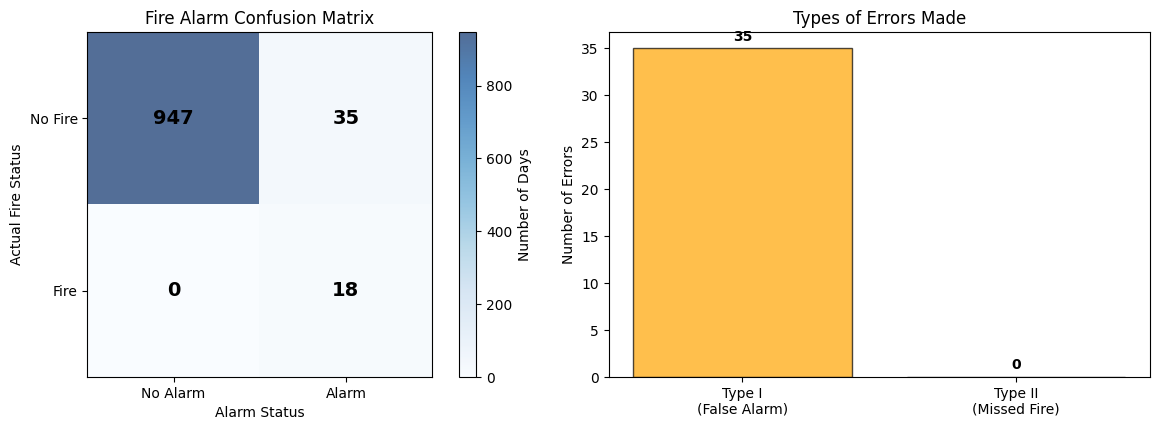

In [13]:
# Create a confusion matrix visualization
plt.figure(figsize=(12, 8))

# Plot 1: Confusion Matrix
plt.subplot(2, 2, 1)
confusion_data = np.array([[true_negatives, false_positives],
                          [false_negatives, true_positives]])

plt.imshow(confusion_data, cmap='Blues', alpha=0.7)
plt.colorbar(label='Number of Days')
plt.title('Fire Alarm Confusion Matrix')
plt.xlabel('Alarm Status')
plt.ylabel('Actual Fire Status')
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.yticks([0, 1], ['No Fire', 'Fire'])

# Add numbers to the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_data[i, j], ha='center', va='center',
                fontsize=14, fontweight='bold')

# Plot 2: Error Types Comparison
plt.subplot(2, 2, 2)
error_types = ['Type I\n(False Alarm)', 'Type II\n(Missed Fire)']
error_counts = [false_positives, false_negatives]
colors = ['orange', 'red']

bars = plt.bar(error_types, error_counts, color=colors, alpha=0.7, edgecolor='black')
plt.title('Types of Errors Made')
plt.ylabel('Number of Errors')

# Add count labels
for bar, count in zip(bars, error_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Real-World Example: Medical Testing

### 🏥 COVID-19 Testing Scenario

**Scenario**: You're running a COVID-19 testing center
- **Null Hypothesis**: Person does NOT have COVID
- **Alternative Hypothesis**: Person HAS COVID

### The Two Mistakes:


In [14]:
# COVID testing simulation
np.random.seed(100)
total_people = 1000
covid_prevalence = 0.05  # 5% of people actually have COVID

# Generate who actually has COVID
actual_covid = np.random.binomial(1, covid_prevalence, total_people)

In [15]:
print("🦠 COVID Testing Simulation:")
print(f"Total people tested: {total_people}")
print(f"People who actually have COVID: {sum(actual_covid)}")
print(f"People who are actually healthy: {total_people - sum(actual_covid)}")

🦠 COVID Testing Simulation:
Total people tested: 1000
People who actually have COVID: 59
People who are actually healthy: 941


In [16]:
def simulate_covid_test(actual_status, sensitivity=0.95, specificity=0.98):
    """
    Simulate COVID test results
    sensitivity: How good the test is at detecting COVID (95% = finds 95% of COVID cases)
    specificity: How good the test is at confirming healthy people (98% = correctly identifies 98% of healthy people)
    """
    test_results = []

    for person_has_covid in actual_status:
        if person_has_covid == 1:  # Person HAS COVID
            # Will test detect it? (depends on sensitivity)
            test_positive = np.random.binomial(1, sensitivity)
        else:  # Person is HEALTHY
            # Will test give false positive? (depends on specificity)
            test_positive = np.random.binomial(1, 1 - specificity)  # 1-specificity = false positive rate

        test_results.append(test_positive)

    return np.array(test_results)

In [17]:
# Run the test simulation
test_results = simulate_covid_test(actual_covid)

In [18]:
print(f"\n🧪 Test Results:")
print(f"Positive test results: {sum(test_results)}")
print(f"Negative test results: {total_people - sum(test_results)}")


🧪 Test Results:
Positive test results: 74
Negative test results: 926


In [19]:
### Analyze the Medical Test Results

In [20]:
# Calculate the four outcomes
tp = sum((actual_covid == 1) & (test_results == 1))  # True Positives
fp = sum((actual_covid == 0) & (test_results == 1))  # False Positives (Type I Error)
tn = sum((actual_covid == 0) & (test_results == 0))  # True Negatives
fn = sum((actual_covid == 1) & (test_results == 0))  # False Negatives (Type II Error)

In [21]:
print("\n📊 Medical Test Analysis:")
print(f"✅ True Positives (Correctly identified COVID): {tp}")
print(f"❌ False Positives (TYPE I ERROR - Healthy person told they have COVID): {fp}")
print(f"✅ True Negatives (Correctly identified healthy): {tn}")
print(f"❌ False Negatives (TYPE II ERROR - COVID person told they're healthy): {fn}")


📊 Medical Test Analysis:
✅ True Positives (Correctly identified COVID): 57
❌ False Positives (TYPE I ERROR - Healthy person told they have COVID): 17
✅ True Negatives (Correctly identified healthy): 924
❌ False Negatives (TYPE II ERROR - COVID person told they're healthy): 2


In [22]:
# Calculate important metrics
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

In [23]:
print(f"\n🎯 Test Performance:")
print(f"Sensitivity (catches {sensitivity*100:.1f}% of COVID cases)")
print(f"Specificity (correctly identifies {specificity*100:.1f}% of healthy people)")
print(f"Type I Error Rate: {fp/(fp+tn)*100:.1f}% (healthy people wrongly diagnosed)")
print(f"Type II Error Rate: {fn/(fn+tp)*100:.1f}% (COVID cases missed)")


🎯 Test Performance:
Sensitivity (catches 96.6% of COVID cases)
Specificity (correctly identifies 98.2% of healthy people)
Type I Error Rate: 1.8% (healthy people wrongly diagnosed)
Type II Error Rate: 3.4% (COVID cases missed)


In [24]:
# The big question: If someone tests positive, what's the chance they actually have COVID?
positive_predictive_value = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"\n🤔 If someone tests positive, there's a {positive_predictive_value*100:.1f}% chance they actually have COVID")


🤔 If someone tests positive, there's a 77.0% chance they actually have COVID


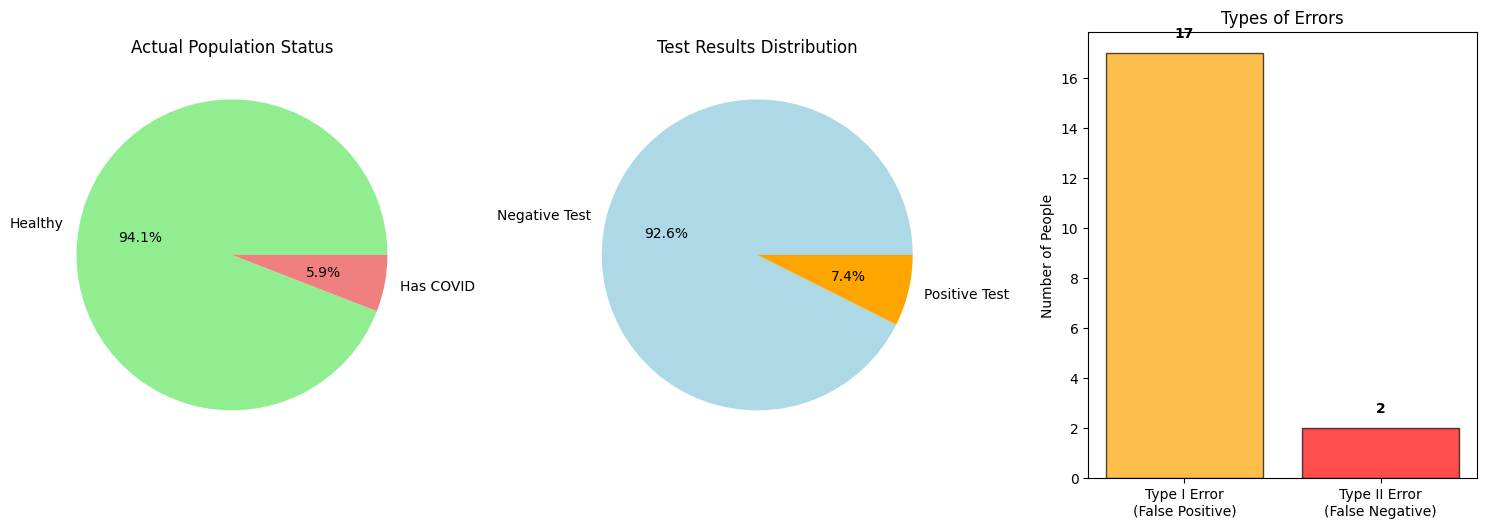

In [25]:
### Visualize Medical Testing Results


plt.figure(figsize=(15, 10))

# Plot 1: Population breakdown
plt.subplot(2, 3, 1)
population_data = [sum(actual_covid == 0), sum(actual_covid == 1)]
labels = ['Healthy', 'Has COVID']
colors = ['lightgreen', 'lightcoral']
plt.pie(population_data, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Actual Population Status')

# Plot 2: Test results breakdown
plt.subplot(2, 3, 2)
test_data = [sum(test_results == 0), sum(test_results == 1)]
test_labels = ['Negative Test', 'Positive Test']
test_colors = ['lightblue', 'orange']
plt.pie(test_data, labels=test_labels, colors=test_colors, autopct='%1.1f%%')
plt.title('Test Results Distribution')

# Plot 3: Error comparison
plt.subplot(2, 3, 3)
error_comparison = [fp, fn]
error_labels = ['Type I Error\n(False Positive)', 'Type II Error\n(False Negative)']
error_colors = ['orange', 'red']
bars = plt.bar(error_labels, error_comparison, color=error_colors, alpha=0.7, edgecolor='black')
plt.title('Types of Errors')
plt.ylabel('Number of People')

for bar, count in zip(bars, error_comparison):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [26]:
# Show the consequences
print("\n💭 Think About the Consequences:")
print("Type I Error (False Positive):")
print("  - Healthy person thinks they have COVID")
print("  - Unnecessary quarantine, stress, treatment")
print("  - Waste of medical resources")


💭 Think About the Consequences:
Type I Error (False Positive):
  - Healthy person thinks they have COVID
  - Unnecessary quarantine, stress, treatment
  - Waste of medical resources


In [27]:
print("\nType II Error (False Negative):")
print("  - COVID person thinks they're healthy")
print("  - They spread the disease to others")
print("  - They don't get treatment when they need it")


Type II Error (False Negative):
  - COVID person thinks they're healthy
  - They spread the disease to others
  - They don't get treatment when they need it


## The Trade-off: You Can't Avoid Both Errors!

### 🎯 This is the KEY insight!

**You cannot eliminate both errors completely!**
- If you try to reduce Type I errors, Type II errors usually increase
- If you try to reduce Type II errors, Type I errors usually increase

### Let's See This Trade-off in Action


In [28]:
# Let's test different alarm sensitivity levels
sensitivity_levels = np.linspace(0.70, 0.99, 10)
false_alarm_rates = []
missed_fire_rates = []

In [49]:
print("🔄 Testing Different Alarm Sensitivity Levels:")
print("Sensitivity | False Alarms | Missed Fires")
for sensitivity in sensitivity_levels:
    # Simulate with this sensitivity level
    alarms = simulate_fire_alarm(actual_fires, sensitivity=sensitivity, false_alarm_rate=0.03)

    # Calculate error rates
    fp = sum((actual_fires == 0) & (alarms == 1))
    fn = sum((actual_fires == 1) & (alarms == 0))
    tn = sum((actual_fires == 0) & (alarms == 0))
    tp = sum((actual_fires == 1) & (alarms == 1))

    false_alarm_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    missed_fire_rate = fn / (fn + tp) if (fn + tp) > 0 else 0

    false_alarm_rates.append(false_alarm_rate)
    missed_fire_rates.append(missed_fire_rate)

    print(f"   {sensitivity:.2f}    |    {false_alarm_rate:.3f}    |    {missed_fire_rate:.3f}")

🔄 Testing Different Alarm Sensitivity Levels:
Sensitivity | False Alarms | Missed Fires
   0.70    |    0.039    |    0.278
   0.73    |    0.033    |    0.111
   0.76    |    0.033    |    0.333
   0.80    |    0.021    |    0.333
   0.83    |    0.034    |    0.056
   0.86    |    0.030    |    0.222
   0.89    |    0.034    |    0.111
   0.93    |    0.046    |    0.167
   0.96    |    0.032    |    0.111
   0.99    |    0.037    |    0.000


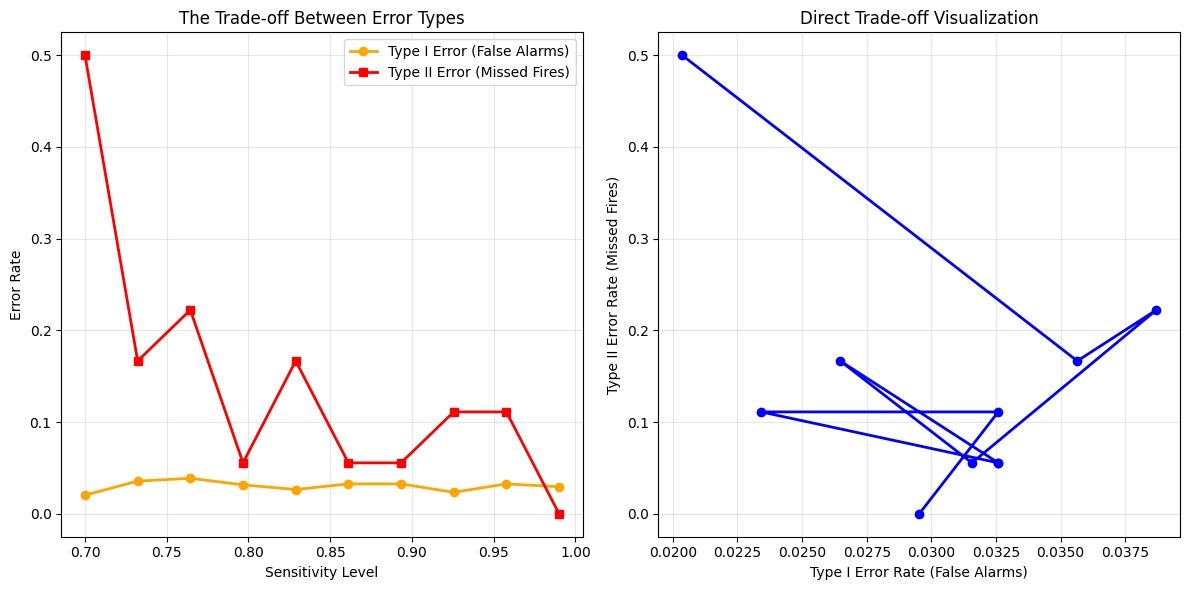

In [31]:
# Visualize the trade-off
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sensitivity_levels, false_alarm_rates, 'o-', color='orange', linewidth=2,
         markersize=6, label='Type I Error (False Alarms)')
plt.plot(sensitivity_levels, missed_fire_rates, 's-', color='red', linewidth=2,
         markersize=6, label='Type II Error (Missed Fires)')
plt.xlabel('Sensitivity Level')
plt.ylabel('Error Rate')
plt.title('The Trade-off Between Error Types')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(false_alarm_rates, missed_fire_rates, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Type I Error Rate (False Alarms)')
plt.ylabel('Type II Error Rate (Missed Fires)')
plt.title('Direct Trade-off Visualization')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Which Error is Worse? (Context Matters!)

### 🤔 It depends on the situation!

**Fire Alarm Example:**
- **Type I Error (False Alarm)**: People evacuate unnecessarily
- **Type II Error (Missed Fire)**: People might die in fire
- **Which is worse?** Missing a fire! Better safe than sorry.

**Medical Testing Example:**
- **Type I Error (False Positive)**: Healthy person gets unnecessary treatment
- **Type II Error (False Negative)**: Sick person doesn't get treatment
- **Which is worse?** Depends on the disease and treatment!

### Different Scenarios, Different Priorities



In [32]:
# Let's compare different scenarios
scenarios = [
    {
        'name': 'Fire Alarm',
        'type_1_consequence': 'Unnecessary evacuation',
        'type_2_consequence': 'People die in fire',
        'worse_error': 'Type II',
        'reason': 'Lives at stake'
    },
    {
        'name': 'Cancer Screening',
        'type_1_consequence': 'Unnecessary worry/treatment',
        'type_2_consequence': 'Cancer spreads untreated',
        'worse_error': 'Type II',
        'reason': 'Early treatment saves lives'
    },
    {
        'name': 'Drug Safety Test',
        'type_1_consequence': 'Safe drug rejected',
        'type_2_consequence': 'Harmful drug approved',
        'worse_error': 'Type II',
        'reason': 'Public safety priority'
    },
    {
        'name': 'Spam Email Filter',
        'type_1_consequence': 'Important email in spam',
        'type_2_consequence': 'Spam in inbox',
        'worse_error': 'Type I',
        'reason': 'Missing important emails worse'
    }
]

In [34]:
for scenario in scenarios:
    print(f"\n🎯 {scenario['name']}:")
    print(f"   Type I Error: {scenario['type_1_consequence']}")
    print(f"   Type II Error: {scenario['type_2_consequence']}")
    print(f"   Worse Error: {scenario['worse_error']}")
    print(f"   Why: {scenario['reason']}")


🎯 Fire Alarm:
   Type I Error: Unnecessary evacuation
   Type II Error: People die in fire
   Worse Error: Type II
   Why: Lives at stake

🎯 Cancer Screening:
   Type I Error: Unnecessary worry/treatment
   Type II Error: Cancer spreads untreated
   Worse Error: Type II
   Why: Early treatment saves lives

🎯 Drug Safety Test:
   Type I Error: Safe drug rejected
   Type II Error: Harmful drug approved
   Worse Error: Type II
   Why: Public safety priority

🎯 Spam Email Filter:
   Type I Error: Important email in spam
   Type II Error: Spam in inbox
   Worse Error: Type I
   Why: Missing important emails worse
